# **Time Series Characterization**

## _ETL Workflow Notebook 4_

## Content:
1. Lag-diagnosis: obtaining autocorrelation (ACF) and partial autocorrelation function (PACF) plots of the time series;
2. Obtaining the 'd' parameter of ARIMA (p, q, d) model;
3. Obtaining the best ARIMA (p, q, d) model;
4. Forecasting with ARIMA model;
5. Forecasting with Facebook Prophet model;
6. Obtaining rolling window statistics of the dataframe;
7. Decomposing seasonality and trend of the time series.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [3]:
import load
from idsw import *

## **Call the functions**

### **Importing the dataset**

In [4]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt),
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset3.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or,
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True
# if you want to read a file with txt extension containing a text formatted as JSON
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’,
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’,
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}


HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = ","
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " "
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep.
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Dataset extracted from dataset3.csv. Check the 10 first rows of this dataframe:



,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,cluster,GY_log
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,1,8.081110
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,33,8.080544
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,46,8.199865
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,11,8.324278
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,42,8.141289
5,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.104295,2.760010,4.117410,0.797507,1.791759,5.100659,29,8.140525
6,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.265493,2.965273,4.290459,0.717840,1.856298,5.177448,32,8.162262
7,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.985273,2.639057,3.891820,0.978326,1.648659,5.120028,55,7.988859
8,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.461300,3.135494,3.784190,0.693147,1.568616,5.235750,44,8.382154
9,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.021774,2.610070,3.793239,0.688135,1.029619,5.279491,31,8.220513


### **Lag-diagnosis: obtaining autocorrelation (ACF) and partial autocorrelation function (PACF) plots of the time series**

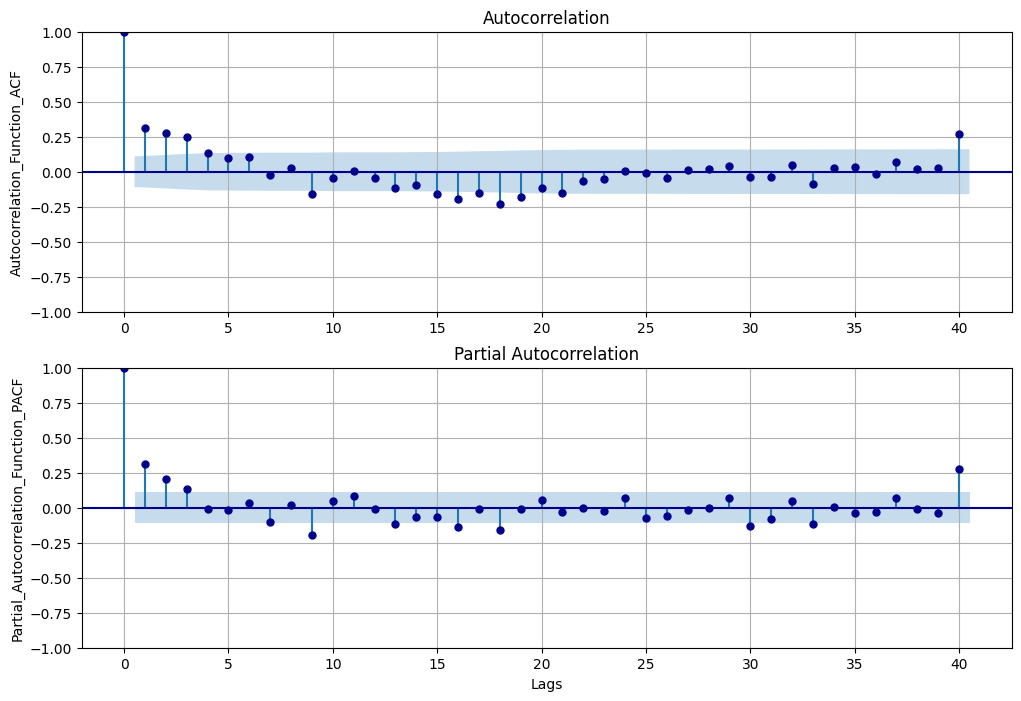



Use this plot to define the parameters (p, q) for testing ARIMA and ARMA models.

p defines the order of the autoregressive part (AR) of the time series.
p = lags correspondent to the spikes of PACF plot (2nd plot) that are outside the error (blue region).

For instance, if there are spikes in both lag = 1 and lag = 2, then p = 2, or p = 1

q defines the order of the moving average part (MA) of the time series.
q = lags correspondent to the spikes of ACF plot that are outside blue region.

For instance, if all spikes until lag = 6 are outside the blue region, then q = 1, 2, 3, 4, 5, 6.

For lag = 0, the correlation and partial correlation coefficients are always equal to 1, because the data is always perfectly correlated to itself.
Therefore, ignore the first spikes (lag = 0) from ACF and PACF plots.


In [5]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

NUMBER_OF_LAGS = 40
# NUMBER_OF_LAGS = integer value. e.g. number_of_lags = 50
# represents how much lags will be tested, and the length of the horizontal axis.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'lag_diagnosis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

lag_diagnosis (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, number_of_lags = NUMBER_OF_LAGS, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [8]:
# Autocorrelation: until 3 months
p = [1, 2, 3] # 3 spikes
q = [1, 2, 3] # 3 spikes

### **Obtaining the 'd' parameter of ARIMA (p, q, d) model**
- The value of "d" corresponds to the total of differentiations for making the process stationary.
- If signal St is non-stationary, we can convert them into stationary signal Tt by differencing: `Tt = St - St-1`.
- "q" represents the moving average (MA) part of the time series.
    - Then, it is interesting to group the time series by each q periods when modelling or analyzing it.

ADF Statistic for 1 Order Differencing
ADF Statistic: -8.664146
p-value: 0.000000
Interpretation:
p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.
H0: the process is non-stationary.
For a 0.95 confidence level, the 1 Order Difference is stationary.
You may select d = 1

ADF Statistic for 2 Order Differencing
ADF Statistic: -9.014264
p-value: 0.000000
Interpretation:
p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.
H0: the process is non-stationary.
For a 0.95 confidence level, the 2 Order Difference is stationary.
You may select d = 2



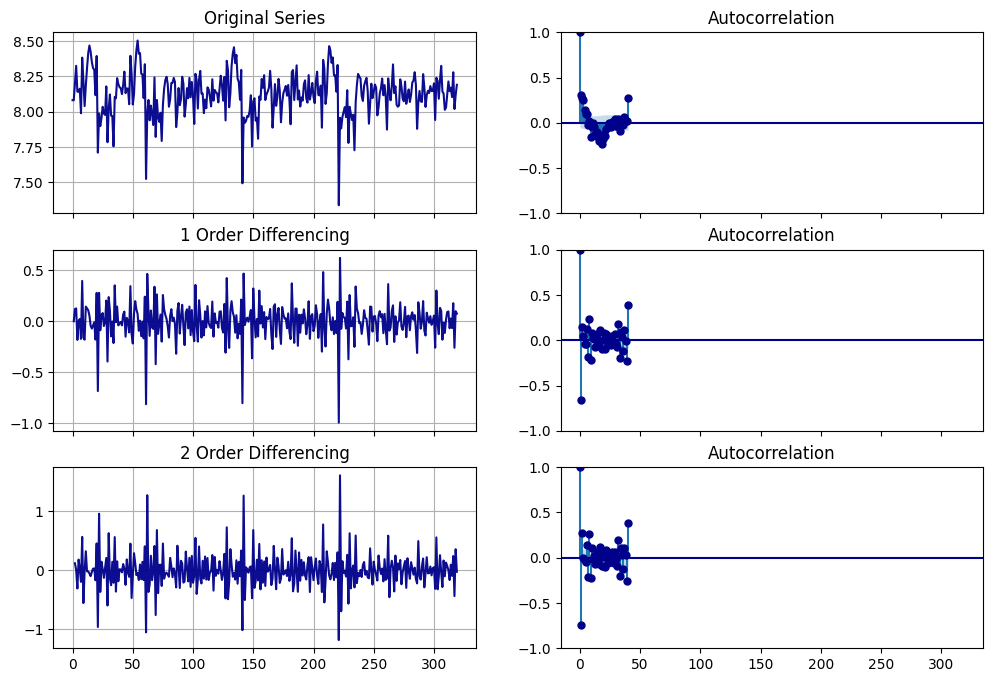



d = differentiation order for making the process stationary.

If d = N, then we have to make N successive differentiations.
A differentiation consists on substracting a signal Si from its previous signal Si-1.

Example: 1st-order differentiating consists on taking the differences on the original time series.
The 2nd-order, in turns, consists in differentiating the 1st-order differentiation series.


In [9]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

NUMBER_OF_LAGS = 40
# NUMBER_OF_LAGS = integer value. e.g. number_of_lags = 50
# represents how much lags will be tested, and the length of the horizontal axis.

MAX_TESTED_d = 2
#MAX_TESTED_d: differential order (integer value)
#change the integer if you want to test other cases. By default, MAX_TESTED_d = 2, meaning
# that the values d = 0, 1, and 2 will be tested.
# If MAX_TESTED_d = 1, d = 0 and 1 will be tested.
# If MAX_TESTED_d = 3, d = 0, 1, 2, and 3 will be tested, and so on.

CONFIDENCE_LEVEL = 0.95
# CONFIDENCE_LEVEL = 0.95 = 95% confidence
# Set CONFIDENCE_LEVEL = 0.90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce CONFIDENCE_LEVEL
# to get less restrictive results.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'test_d_parameters.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

test_d_parameters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, number_of_lags = NUMBER_OF_LAGS, max_tested_d = MAX_TESTED_d, confidence_level = CONFIDENCE_LEVEL, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [10]:
d = 1

### **Obtaining the best ARIMA (p, q, d) model**

ARIMA model from date (or measurement) = 2022-12-01 00:00:00; to date (or measurement) = 2023-04-01 00:00:00.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 GY_log   No. Observations:                  320
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 169.206
Date:                Wed, 10 Sep 2025   AIC                           -326.412
Time:                        14:58:00   BIC                           -303.820
Sample:                             0   HQIC                          -317.390
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2129      0.099     -2.143      0.032      -0.408      -0.018
ar.L2          0.7842      0.098      8.000      0.000       0.592       0.976
ma.L1         -0.5218      6.011     -0.087      0.9

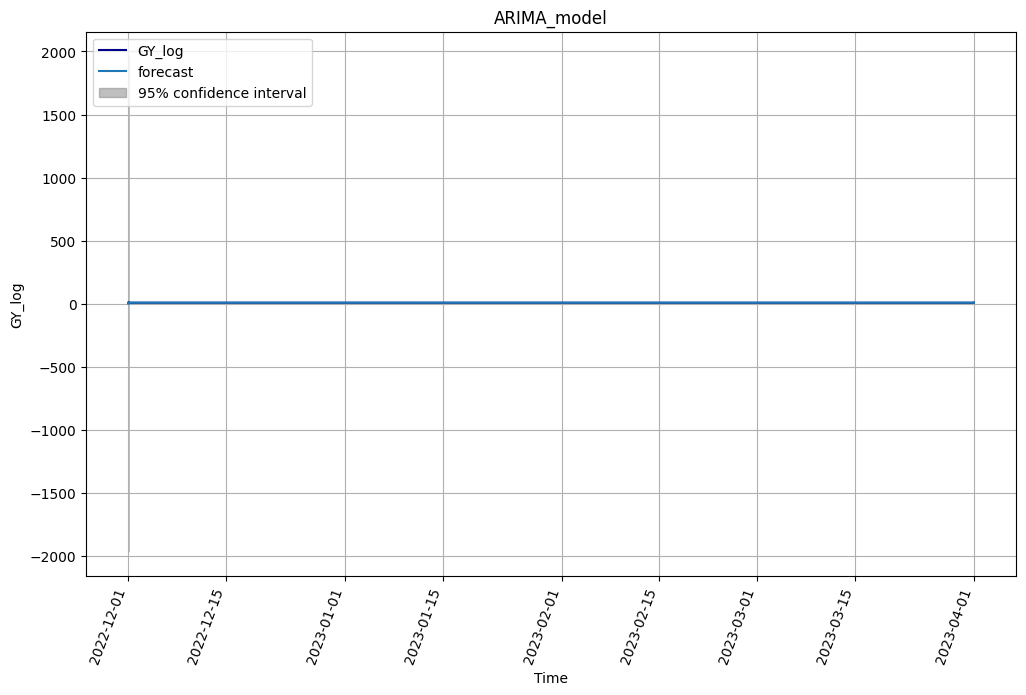



Check the dataframe containing the ARIMA predictions:



,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,cluster,GY_log,arima_predictions,lower_cl,upper_cl
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.721295,4.587006,0.593327,1.648659,5.025195,1,8.081110,0.000000,-1959.964015,1959.964015
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.890372,4.593098,0.559616,2.001480,4.980794,33,8.080544,8.081110,7.734579,8.427641
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.667228,4.171306,0.832909,1.974081,5.194345,46,8.199865,8.080800,7.771852,8.389748
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.734368,4.409155,0.982078,2.104134,5.237877,11,8.324278,8.132548,7.833266,8.431829
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.985682,3.891820,0.494696,1.280934,5.081466,42,8.141289,8.206279,7.912141,8.500416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,2.379546,3.594569,0.908259,1.098612,5.062152,47,8.102990,8.127653,7.850336,8.404970
316,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,2.070653,4.580877,1.115142,1.481605,5.037602,17,8.278761,8.144809,7.867494,8.422123
317,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,2.789323,4.261693,0.751416,1.098612,5.080224,30,8.018688,8.152174,7.874860,8.429488
318,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,2.793004,4.327174,0.609766,1.300192,4.906681,45,8.116396,8.136071,7.858760,8.413383




Notice that the presence of data outside the confidence interval limits of the ARIMA forecast is a strong indicative of outliers or of untrust time series.

For instance: if you observe a very sharp and sudden deviation from the predictive time series, it can be an indicative of incomplete information or outliers presence.

A famous case is the pandemic data: due to lags or latencies on the time needed for consolidating the information in some places, the data could be incomplete in a given day, leading to a sharp decrease that did not actually occurred.


REMEMBER: q represents the moving average (MA) part of the time series.
Then, it is interesting to group the time series GY_log by each q = 3 periods when modelling or analyzing it.
For that, you can use moving window or rolling functions.



In [11]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

TIMESTAMP_TAG_COLUMN = 'timestamp'
# TIMESTAMP_TAG_COLUMN = None - keep it as None if you do not want to inform the timestamps
# Alternatively, declare a string (inside quotes),
# containing the name of the column containing the time information.
# e.g. TIMESTAMP_TAG_COLUMN = "DATE" will take the timestamps from column 'DATE'.
# If no column is provided, the index in the dataframe will be used.

p_VALS_LIST = p
#p_vals: list of integers correspondent to the lags (spikes) in the PACF plot.
# From function lag_diagnosis
# e.g. for testing the values 1, 2, and 3, set p_VALS_LIST = [1, 2, 3]
# for testing 1 and 5, set p_VALS_LIST = [1, 5]

BEST_d_PARAM = 1
#d = difference for making the process stationary.
# From function test_d_parameters
# Integer value. Alternatively, set BEST_d_PARAM as the 'd' value returned from test_d_parameters
# e.g. BEST_d_PARAM = 0, for the ARMA model;
# e.g. BEST_d_PARAM = 2; BEST_d_PARAM = 3; etc.

q_VALS_LIST = q
#q_vals: list of integers correspondent to the lags (spikes) in ACF plot.
# From function lag_diagnosis
# e.g. for testing the values 1, 2, and 3, set p_VALS_LIST = [1, 2, 3]
# for testing 1 and 5, set p_VALS_LIST = [1, 5]

## WARNING: do not test the ARIMA/ARMA model for p = 0, or q = 0.
## For lag = 0, the correlation and partial correlation coefficients
## are always equal to 1, because the data is perfectly correlated to itself.
## Therefore, ignore the first spikes (lag = 0) of ACF and PACF plots.

CONFIDENCE_LEVEL = 0.95
# CONFIDENCE_LEVEL = 0.95 = 95% confidence
# Set CONFIDENCE_LEVEL = 0.90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce CONFIDENCE_LEVEL
# to get less restrictive results.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'arima_model.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#ARIMA model object saved as ARIMA_model; dictionary saved as arima_summ_dict.
# Dataframe object containing model predictions and confidence intervals saved as arima_df
# Simply modify these object on the left of equality:
ARIMA_model, arima_summ_dict, arima_df = best_arima_model (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, p_vals = p_VALS_LIST, d = BEST_d_PARAM, q_vals = q_VALS_LIST, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, confidence_level = CONFIDENCE_LEVEL, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Forecasting with ARIMA model**

No unit or invalid unit provided for timedelta. Then, returned timedelta in nanoseconds (1s = 10^9 ns).

Time delays successfully calculated. Check dataset's 10 first rows:



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results', 'alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,cluster,GY_log,source,timestamp_delayed,time_delay_ns
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.721295,4.587006,0.593327,1.648659,5.025195,1,8.081110,input_dataframe,2022-12-01,0.0
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.760010,4.039536,0.896088,1.686399,5.120625,55,7.986892,input_dataframe,2022-12-01,0.0
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.844909,3.862833,0.936093,1.568616,5.036498,37,7.897783,input_dataframe,2022-12-01,0.0
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.747271,3.828641,0.746688,1.335001,4.928557,27,7.955074,input_dataframe,2022-12-01,0.0
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.965273,3.845883,0.741937,1.335001,5.088152,0,8.034300,input_dataframe,2022-12-01,0.0
5,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.879198,4.158883,0.815365,1.609438,5.193401,2,7.986461,input_dataframe,2022-12-01,0.0
6,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.856470,3.496508,0.959350,1.722767,4.910889,8,7.977055,input_dataframe,2022-12-01,0.0
7,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.760010,3.887730,0.657520,1.568616,5.055991,42,8.178291,input_dataframe,2022-12-01,0.0
8,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.595255,4.325456,0.815365,1.609438,4.881210,14,7.783803,input_dataframe,2022-12-01,0.0
9,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,2.694627,3.828641,0.837248,1.481605,5.334794,41,8.019034,input_dataframe,2022-12-01,0.0


Average delay = 32772413793103.449219 ns



Average delay on the original time series, used for obtaining times of predicted values = 32772413793103.45.

Dataframes successfully concatenated. Check the 10 first rows of new dataframe:



,Cultivar_74K75RSF CE_OneHotEnc,Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc,Cultivar_79I81RSF IPRO_OneHotEnc,Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc,Cultivar_82I78RSF IPRO_OneHotEnc,Cultivar_83IX84RSF I2X_OneHotEnc,Cultivar_96R29 IPRO_OneHotEnc,Cultivar_97Y97 IPRO_OneHotEnc,Cultivar_98R30 CE_OneHotEnc,Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc,...,f6_cos,f6_sin,f7_cos,f7_sin,f8_cos,f8_sin,lower_cl,source,timestamp,upper_cl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717644,0.69641,0.030025,0.999549,-0.99908,0.042886,NaN,input_dataframe,2022-12-01,NaN


Finished the obtention of the forecast dataset. Check the 10 last rows of the forecast dataset:



,timestamp,Cultivar_74K75RSF CE_OneHotEnc,Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc,Cultivar_79I81RSF IPRO_OneHotEnc,Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc,Cultivar_82I78RSF IPRO_OneHotEnc,Cultivar_83IX84RSF I2X_OneHotEnc,Cultivar_96R29 IPRO_OneHotEnc,Cultivar_97Y97 IPRO_OneHotEnc,Cultivar_98R30 CE_OneHotEnc,...,f6_cos,f6_sin,f7_cos,f7_sin,f8_cos,f8_sin,GY_log,lower_cl,upper_cl,source
328,2023-04-04 09:55:51.724137927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forecast
329,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.156767,7.879458,8.434076,forecast
330,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.124774,7.837661,8.411887,forecast
331,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.150280,7.856806,8.443753,forecast
332,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.119761,7.822672,8.416849,forecast
333,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.146260,7.846673,8.445847,forecast
334,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.116685,7.815716,8.417654,forecast
335,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.143763,7.841764,8.445761,forecast
336,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.114805,7.812267,8.417343,forecast
337,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.142205,7.839220,8.445189,forecast


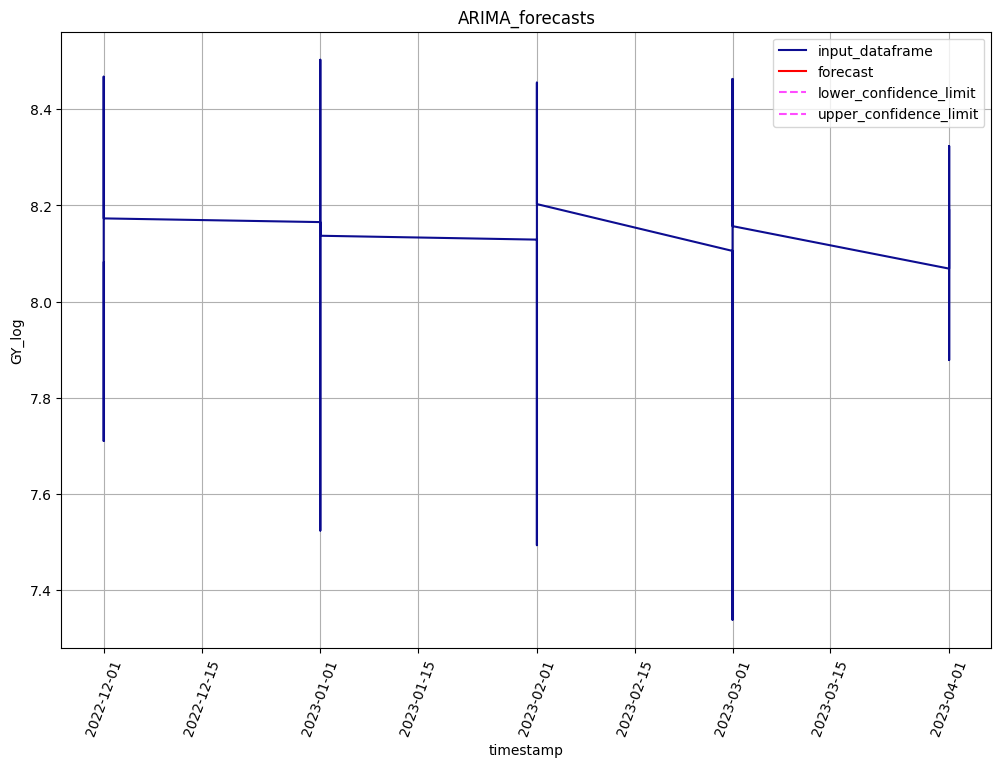


ARIMA Forecasting completed.



In [13]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_FORECAST = 'GY_log'
# COLUMN_TO_FORECAST: string (inside quotes),
# containing the name of the column that will be analyzed.
# Keep it as None if the graphic of the predictions will not be shown with the
# responses or if the combined dataset will not be returned.
# e.g. COLUMN_TO_FORECAST = "column1" will analyze and forecast values for
# the column named as 'column1'.

TIMESTAMP_TAG_COLUMN = 'timestamp'
# TIMESTAMP_TAG_COLUMN = None - keep it as None if you do not want to inform the timestamps
# Alternatively, declare a string (inside quotes),
# containing the name of the column containing the time information.
# e.g. TIMESTAMP_TAG_COLUMN = "DATE" will take the timestamps from column 'DATE'.
# If no column is provided, the index in the dataframe will be used.

# DATASET = None, TIMESTAMP_TAG_COLUMN = None - keep it as None if you do not want to show
# the ARIMA predictions combined to the original data; or if you do not want to append
# the ARIMA predictions to the original dataframe.
# Alternatively, set:
# DATASET: the whole dataframe to be processed.

ARIMA_MODEL_OBJECT = ARIMA_model
# ARIMA_MODEL_OBJECT : object containing the ARIMA model previously obtained.
# e.g. arima_model_object = returned_ARIMA_Results if the model was obtained as returned_ARIMA_Results
# do not declare in quotes, since it is an object, not a string.

TIME_UNIT = None
# TIME_UNIT: Unit of the new column. If no value is provided, the unit will be considered as nanoseconds.
# Alternatively: keep it None, for the results in nanoseconds, or input TIME_UNIT =
# 'year', 'month', 'day', 'hour', 'minute', or 'second' (keep these inside quotes).
# It will be the input for the function calculate_delay.

NUMBER_OF_PERIODS_TO_FORECAST = 9
# integer value representing the total of periods to forecast. The periods will be in the
# unit (dimension) of the original dataset. If 1 period = 1 day, 7 periods will represent
# seven days.

PLOT_PREDICTED_TIME_SERIES = True
# Keep PLOT_PREDICTED_TIME_SERIES = True to see the graphic of the predicted values.
# Alternatively, set plot_predicted_time_series = True not to show the plot.

CONFIDENCE_LEVEL = 0.95
# CONFIDENCE_LEVEL = 0.95 = 95% confidence
# Set CONFIDENCE_LEVEL = 0.90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce CONFIDENCE_LEVEL
# to get less restrictive results.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'arima_forecast.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dataframe object containing model predictions and confidence intervals saved as forecast_df
# Simply modify this object on the left of equality:
forecast_df = arima_forecasting (arima_model_object = ARIMA_MODEL_OBJECT, df = DATASET, column_to_forecast = COLUMN_TO_FORECAST, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, time_unit = TIME_UNIT, number_of_periods_to_forecast = NUMBER_OF_PERIODS_TO_FORECAST, confidence_level = CONFIDENCE_LEVEL, plot_predicted_time_series = PLOT_PREDICTED_TIME_SERIES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Obtaining Prophet model**

In [14]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

TIMESTAMP_TAG_COLUMN = 'timestamp'
# TIMESTAMP_TAG_COLUMN = 'timestamp' - declare a string (inside quotes),
# containing the name of the column containing the time information.
# e.g. TIMESTAMP_TAG_COLUMN = "DATE" will take the timestamps from column 'DATE'.
# If no column is provided, the index in the dataframe will be used.

LIST_OF_PREDICTORS = None
# LIST_OF_PREDICTORS = None
# If the response variable will not be used to predict itself, but instead
# other variable(s) will be used as predictor(s) (regressors), declare such
# variables inside a list of strings or as a string.
# Example: LIST_OF_PREDICTORS = ['col1', 'col2', 'col3'] will use columns named
# as 'col1', 'col2', and 'col3' to predict the response variable.
# ATTENTION: There is a maximum number of regressors allowed by Prophet. When using more than the
# 53-predictors limit, an error will be raised.

CONFIDENCE_LEVEL_PERCENT = 95.0
# CONFIDENCE_LEVEL_PERCENT = 95.0 represents the level of confidence for the
# calculated intervals. If CONFIDENCE_LEVEL_PERCENT = 95.0, then 95% confidence
# intervals will be obtained. If CONFIDENCE_LEVEL_PERCENT = 90.0,
# 90% confidence intervals are obtained.


# Prophet model object saved as prophet_model;
# Simply modify this object on the left of equality:
prophet_model = get_prophet_model (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, list_of_predictors = LIST_OF_PREDICTORS, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjg5__qs/kds8l4f9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwjg5__qs/45986uwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64436', 'data', 'file=/tmp/tmpwjg5__qs/kds8l4f9.json', 'init=/tmp/tmpwjg5__qs/45986uwl.json', 'output', 'file=/tmp/tmpwjg5__qs/prophet_modelqbw2wwiy/prophet_model-20250910145900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:00 - cmdstanpy - INFO - Chain

Facebook Prophet model successfully fitted to the time series and returned as 'model'.
Prophet is designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.
Prophet implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.



### **Forecasting with Prophet model**
- This function requires Plotly library to show the complete forecasts.

Finished the obtention of the forecast dataset. Check the 10 last rows of the forecast dataset:



,timestamp,trend,lower_cl,upper_cl,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,y_forecasts
4,2023-04-01,8.133296,7.820319,8.443674,8.133296,8.133296,0.0,0.0,0.0,0.0,0.0,0.0,8.133296
5,2023-04-02,8.133644,7.848428,8.445049,8.133634,8.133656,0.0,0.0,0.0,0.0,0.0,0.0,8.133644
6,2023-04-03,8.133991,7.840573,8.452562,8.133959,8.134030,0.0,0.0,0.0,0.0,0.0,0.0,8.133991
7,2023-04-04,8.134339,7.840472,8.430947,8.134275,8.134419,0.0,0.0,0.0,0.0,0.0,0.0,8.134339
8,2023-04-05,8.134687,7.832689,8.436643,8.134589,8.134810,0.0,0.0,0.0,0.0,0.0,0.0,8.134687
9,2023-04-06,8.135034,7.822116,8.471743,8.134900,8.135213,0.0,0.0,0.0,0.0,0.0,0.0,8.135034
10,2023-04-07,8.135382,7.822909,8.415791,8.135203,8.135620,0.0,0.0,0.0,0.0,0.0,0.0,8.135382
11,2023-04-08,8.135730,7.841910,8.433581,8.135502,8.136029,0.0,0.0,0.0,0.0,0.0,0.0,8.135730
12,2023-04-09,8.136077,7.846513,8.420621,8.135803,8.136444,0.0,0.0,0.0,0.0,0.0,0.0,8.136077
13,2023-04-10,8.136425,7.830241,8.394791,8.136077,8.136865,0.0,0.0,0.0,0.0,0.0,0.0,8.136425


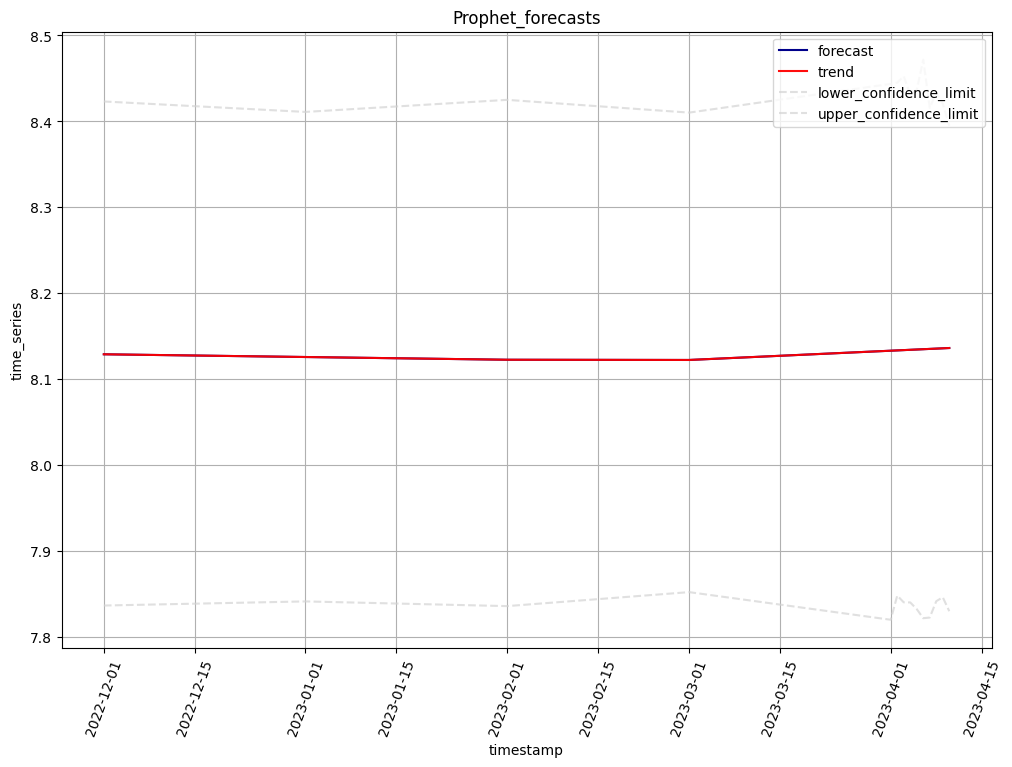


Prophet Forecasting completed.



In [15]:
PROPHET_MODEL_OBJECT = prophet_model
# PROPHET_MODEL_OBJECT : object containing the Prophet model previously obtained.
# e.g. prophet_model_object = prophet_model if the model was obtained as prophet_model
# do not declare in quotes, since it is an object, not a string.

NUMBER_OF_PERIODS_TO_FORECAST = 9
# integer value representing the total of periods to forecast. The periods will be in the
# unit (dimension) of the original dataset. If 1 period = 1 day, 7 periods will represent
# seven days.


# X, TIMESTAMP_COLUMN, MAKE_FUTURE_FORECASTS_WITH_MULTIPLE_REGRESSORS, FORECASTS_BASED_ON:
# parameters for making predictions for models with more than 1 predictor.
X = None
# X is the dataframe object that will be used for making the predictions, and must be filled in this
# case.
# e.g. X = dataset. The columns must be in the exact same order they were used for training the model.
TIMESTAMP_COLUMN = 'timestamp'
# If the first column (timestamp) is not input as "ds", the column name must be input as a string
# in TIMESTAMP_COLUMN.
# Example: TIMESTAMP_COLUMN = 'timestamp'.
MAKE_FUTURE_FORECASTS_WITH_MULTIPLE_REGRESSORS = True
# MAKE_FUTURE_FORECASTS_WITH_MULTIPLE_REGRESSORS = True - If True, the future forecasts will be
# performed for the dataframe X. If False, only X will be used for predictions.
FORECASTS_BASED_ON = 'mean'
# FORECASTS_BASED_ON = 'mean' - For the case we are making forecasts based on multiple regressors,
# the values of the regressors must be set. You may use FORECASTS_BASED_ON = 'mean' for
# applying the mean historical value; FORECASTS_BASED_ON = 'ffill' to copy the nearest element on
# the dataset (forward-filling); or FORECASTS_BASED_ON = 'mode' to use the mode (most common value)
# to perform missing value imputation.


PLOT_PREDICTED_TIME_SERIES = True
# Keep plot_predicted_time_series = True to see the graphic of the predicted values.
# Alternatively, set plot_predicted_time_series = False not to show the plot.

GET_INTERACTIVE_PLOT = False
# get_interactive_plot = True will show the interactive Plotly version of the model predictions.
# If False, the matplotlib static figure will be shown.

# THE IMAGE MANIPULATION PARAMETERS ARE ONLY VALID IF get_interactive_plot = False

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'arima_forecast.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dataframe object containing model predictions and confidence intervals saved as forecast_df
# Simply modify this object on the left of equality:
forecast_df = prophet_forecasting (prophet_model_object = PROPHET_MODEL_OBJECT, number_of_periods_to_forecast = NUMBER_OF_PERIODS_TO_FORECAST, X = X, timestamp_column = TIMESTAMP_COLUMN, make_future_forecasts_with_multi_regressors = MAKE_FUTURE_FORECASTS_WITH_MULTIPLE_REGRESSORS, forecasts_based_on = FORECASTS_BASED_ON, plot_predicted_time_series = PLOT_PREDICTED_TIME_SERIES, get_interactive_plot = GET_INTERACTIVE_PLOT, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Decomposing seasonality and trend of the time series**

Testing additive model for seasonal decomposition.

Testing the presence of until 100 periods or cycles in the time series.

Number of total cycles or periods in time series: 2.

Seasonal decomposition concluded using (320,) observations.

Check the first 10 rows of the seasonal decompose dataframe obtained:



,timestamp,observed_data,seasonal_component,trend_component,residuals
0,2022-12-01,8.081110,-0.001621,NaN,NaN
1,2022-12-01,7.986892,0.001621,7.988170,-0.002898
2,2022-12-01,7.897783,-0.001621,7.934383,-0.034979
3,2022-12-01,7.955074,0.001621,7.960558,-0.007105
4,2022-12-01,8.034300,-0.001621,8.002534,0.033388
5,2022-12-01,7.986461,0.001621,7.996069,-0.011230
6,2022-12-01,7.977055,-0.001621,8.029716,-0.051039
7,2022-12-01,8.178291,0.001621,8.029360,0.147310
8,2022-12-01,7.783803,-0.001621,7.941233,-0.155809
9,2022-12-01,8.019034,0.001621,7.985793,0.031619




Check the time series decomposition graphics for the additive model:



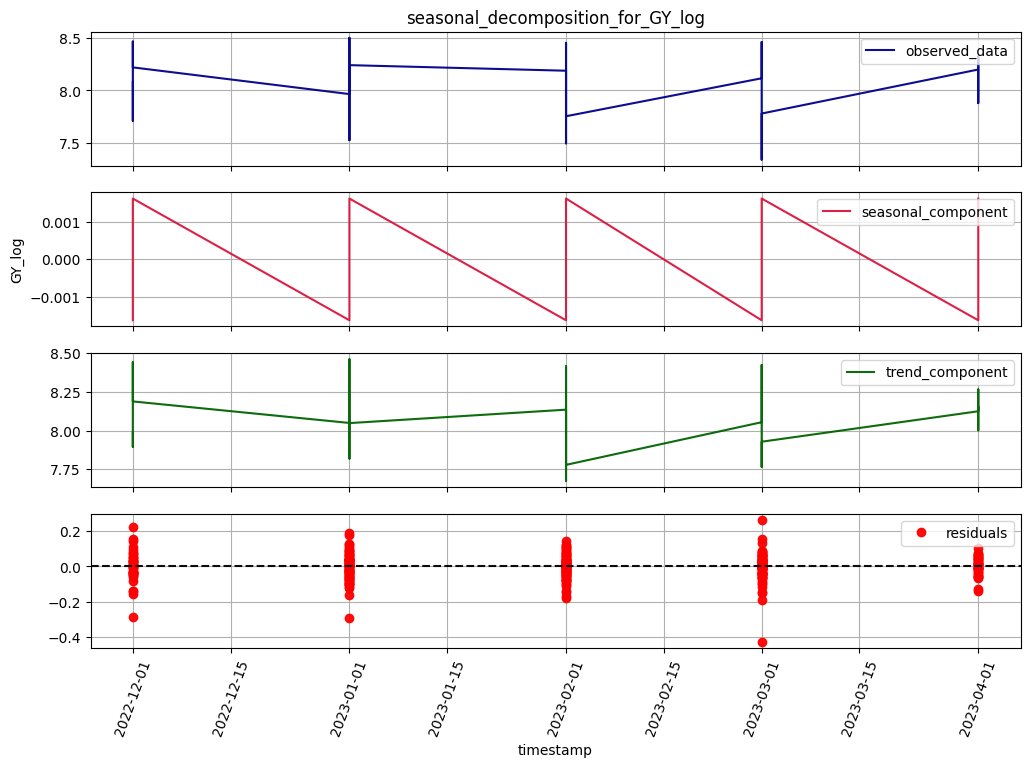

The full dataframe obtained from the decomposition, as well as the Statsmodels decomposition object were returned.


In [16]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

RESPONSE_COLUMN_TO_ANALYZE = "GY_log"
#response_column_to_analyze: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. response_column_to_analyze = "column1" will analyze the column named as 'column1'.
# WARNING: This must be the response variable
COLUMN_WITH_TIMESTAMPS = 'timestamp'
#column_with_timestamps: string (inside quotes),
# containing the name of the column containing timestamps.
# Keep it as None if you want to set the index as the time.
# e.g. response_column_to_analyze = "column1" will analyze the column named as 'column1'.

DECOMPOSITION_MODE = "additive"
# decomposition_mode = "additive" - manipulate the parameter 'model'
# from seasonal_decompose.
# model = decomposition_mode
# Alternatively, set decomposition_mode = "multiplicative"
# for decomposing as a multiplicative time series.
MAXIMUM_NUMBER_OF_CYCLES_OR_PERIODS_TO_TEST = 100
# MAXIMUM_NUMBER_OF_CYCLES_OR_PERIODS_TO_TEST = integer (minimum value is 2) representing
# the total of cycles or periods that may be present on time series. The function will loop through
# 2 to MAXIMUM_NUMBER_OF_CYCLES_OR_PERIODS_TO_TEST to find the number that minimizes the sum of
# modules (absolute values) of the residues.
# e.g. MAXIMUM_NUMBER_OF_CYCLES_OR_PERIODS_TO_TEST = 4 will test 2, 3 and 4 cycles on the time series.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'seasonal_decomposition.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

# Dataframe object containing the series resultant from the decomposition (seasonality and trend)
# returned as seasonal_decompose_df. Decomposition object returned as
# decomposition_obj.
# Simply modify these objects on the left of equality:
seasonal_decompose_df, decomposition_obj = seasonal_decomposition (df = DATASET, response_column_to_analyze = RESPONSE_COLUMN_TO_ANALYZE, column_with_timestamps = COLUMN_WITH_TIMESTAMPS, decomposition_mode = DECOMPOSITION_MODE, maximum_number_of_cycles_or_periods_to_test = MAXIMUM_NUMBER_OF_CYCLES_OR_PERIODS_TO_TEST, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Importing or exporting models and dictionaries (or lists)**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 2: import only a dictionary or a list

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary or list saved as imported_dict_or_list.
# Simply modify this object on the left of equality:
imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 3: import a model and a dictionary (or a list)

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary or list saved as imported_dict_or_list.
# Simply modify these objects on the left of equality:
model, imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 4: export a model and/or a dictionary (or a list)

In [ ]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

## **Exporting dataframes as Excel file tables**

In [ ]:
## WARNING: all files exported from this function are .xlsx

FILE_NAME_WITHOUT_EXTENSION = "datasets"
# (string, in quotes): input the name of the
# file without the extension. e.g. new_file_name_without_extension = "my_file"
# will export a file 'my_file.xlsx' to notebook's workspace.

EXPORTED_TABLES = [{'dataframe_obj_to_be_exported': None,
                    'excel_sheet_name': None},]

# exported_tables is a list of dictionaries. User may declare several dictionaries,
# as long as the keys are always the same, and if the values stored in keys are not None.

# key 'dataframe_obj_to_be_exported': dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: dataframe_obj_to_be_exported = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

# key 'excel_sheet_name': string containing the name of the sheet to be written on the
# exported Excel file. Example: excel_sheet_name = 'tab_1' will save the dataframe in the
# sheet 'tab_1' from the file named as file_name_without_extension.

# examples: exported_tables = [{'dataframe_obj_to_be_exported': dataset1,
# 'excel_sheet_name': 'sheet1'},]
# will export only dataset1 as 'sheet1';
# exported_tables = [{'dataframe_obj_to_be_exported': dataset1, 'excel_sheet_name': 'sheet1'},
# {'dataframe_obj_to_be_exported': dataset2, 'excel_sheet_name': 'sheet2']
# will export dataset1 as 'sheet1' and dataset2 as 'sheet2'.

# Notice that if the file does not contain the exported sheets, they will be created. If it has,
# the sheets will be replaced.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None


export_pd_dataframe_as_excel (file_name_without_extension = FILE_NAME_WITHOUT_EXTENSION, exported_tables = EXPORTED_TABLES, file_directory_path = FILE_DIRECTORY_PATH)

****

# **Lag Diagnosis - Autocorrelation (ACF) and Partial Autocorrelation Function (PACF) Plots - Background**

## **Autocorrelation Function (ACF)**
The autocorrelation function (ACF) is a statistical technique that we can use to **identify how correlated the values in a time series are with each other**.
- The ACF plots the correlation coefficient against the **lag, which is measured in terms of a number of periods or units**.
- A lag corresponds to a certain point in time after which we observe the first value in the time series.
- The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship).
- **A coefficient of 0 means that there is no relationship between the variables.** Also, most often, it is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

It’s most often used to analyze sequences of numbers from random processes, such as economic or scientific measurements. It can also be used to detect systematic patterns in correlated data sets such as securities prices or climate measurements.

Blue regions on an ACF plot are the error bands: **anything within these regions is not statistically significant.**
- It means that correlation values outside of this area are very likely a correlation and not a statistical fluke.
- The confidence interval is set to 95% by default.

Notice that **for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.**

To summarize, **autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation.**
## **Partial Autocorrelation Function (PACF)**
Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables. For example, if we are regressing a signal S at lag t (St) with the same signal at lags t-1, t-2 and t-3 (St-1, St-2, St-3), **the partial correlation between St and St-3 is the amount of correlation between St and St-3 that is not explained by their mutual correlations with St-1 and St-2.**
- The way of finding PACF between St and St-3 is to use a regression model:

`St = ∅1St-1 + ∅2St-2 + ∅3St-3 + ϵ`
   
where  ∅1, ∅2 and ∅3 are coefficients and ϵ is error. From the regression formula above, the PACF value between St and St-3 is the coefficient ∅3.
- This coefficient will give us direct effect of time-series St-3 to the time-series St because the effects of St-2 and St-1 are already captured by ∅1 and ∅2.

To summarize, **a partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself**.
## **Stationarity**
When it comes to time series forecasting, the stationarity of a time series is one of the most important conditions that the majority of algorithms require.

**Briefly, a time-series St is stationary (weak stationarity) if these conditions are met**:

1.	St has a constant mean.
2.	St has a constant standard deviation.
3.	There is no seasonality in St. If St has a repeating pattern within a year, then it has seasonality.

We can check the stationarity of the signal visually (approximation) or using some statistical hypothesis for a more precise answer. For that purpose, we can mention two tests:
•	Augmented Dickey-Fuller Test (ADF) with the null hypothesis that the signal is non-stationary.
•	Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS) with the null hypothesis that the signal is stationary.

If signal St is non-stationary, we can convert them into stationary signal Tt by differencing:

`Tt = St - St-1`

or calculating percent of change:

`Tt = (St - St-1)/(St-1)`

Notwithstanding these transformations, signal Tt won’t always be stationary. It is rare but can happen. In that case, if Tt stays non-stationary, we can apply the same transformation to signal Tt. AFC and PACF change as the signal goes through transformations.

# **Autoregressive Moving Average (ARMA) and ARIMA Models - Background**

## **Autoregressive Moving Average (ARMA) Model**
The ARMA(p, q) model is a time series forecasting technique used in economics, statistics, and signal processing to characterize relationships between variables.

This model can predict future values based on past values and has two parameters, **p and q, which respectively define the order of the autoregressive part (AR) and moving average part (MA).**
- **Both AR and MA models require the stationarity of the signal.**
- Usually, using non-stationary time series in regression models can lead to a high R-squared value and statistically significant regression coefficients. These results are very likely misleading or spurious.
- That is because there is probably no real relationship between them and the only common thing is that they are growing (or decreasing) over time.

## **Autoregressive Model (AR)**
The autoregressive (AR) model is a statistical model that **expresses the dependence of one variable on an earlier time period. It’s a model where signal St depends only on its own past values.**
- For example, AR(3) is a model that **depends on 3 of its past values and can be written as**:

`St = β0 + β1St-1 + β2St-2 + β3St-3 + ϵt`

where β0, β1, β2¸ β3 are coefficients and ϵt is error.

**We can select the order p for AR(p) model based on significant spikes from the PACF plot. One more indication of the AR process is that the ACF plot decays more slowly.**
- For instance, we can conclude from the example above (generated PACF graphic for the studied data) that the PACF plot has significant spikes at lags 2 and 3 because of the significant PACF value.
- In contrast, for everything within the blue band, we do not have evidence that it is different from zero. Also, we could try other p values of lag that are outside of the blue belt.

To conclude, **the number of bars outside the blue boundary of the PACF plot tell us the order of the AR model.**

## **Moving Average (MA)**
**The MA(q) model calculates its forecast value by taking a weighted average of past errors.** It has the ability to capture trends and patterns in time series data.
- For example, MA(3) for a signal St can be formulated as

`St = μ + ϵt + γ1ϵt-1 + γ2ϵt-2 + γ3ϵt-3`

where μ is the mean of a series, γ1, γ2¸ γ3 are coefficients and ϵt, ϵt-1, ϵt-2, ϵt-3 are **errors that have a normal distribution with mean zero and standard deviation one (sometimes called white noise).**

In contrast to the AR model, we can **select the order q for model MA(q) from ACF if this plot has a sharp cut-off after lag q. One more indication of the MA process is that the PACF plot decays more slowly.**
- Similarly to selecting p for the AR(p) model, in order to select the appropriate q order for the MA model, **we need to analyze all spikes higher than the blue area, but now in the ACF plot.**
- In that sense, from the image above (studied data), we can try using q = 1, 2, 3, 4, or or q = 5.

The image below shows an interesting example where we could try q = 3, or q = 6, since these are the bars above the error region:
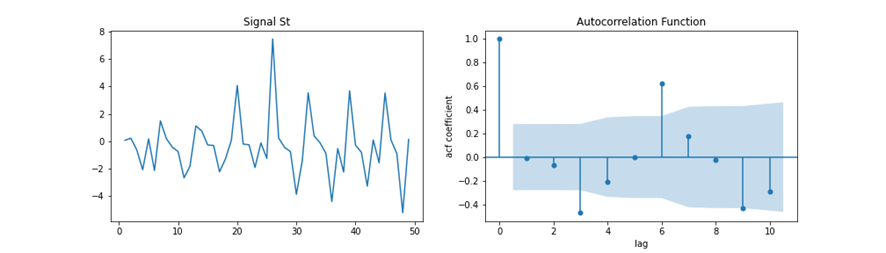

## **ARMA Definition**
ARMA(p, q) is a combination of AR(p) and MA(q) models. For example, ARMA(3,3) of signal the St can be formulated as

`St = β0 + β1St-1 + β2St-2 + β3St-3 + ϵt + γ1ϵt-1 + γ2ϵt-2 + γ3ϵt-3`

where β, γ are coefficients and ϵ error. We already described the way of choosing order p and q in the section for AR and MA models.

## Since our search space is not big, **usually values p and q are not higher than 10**.
- We will only test values up to 10.

Notice that, for spikes in the limiar region of the 95% confidence interval, it is also interesting to analyze their decay rate: **when the inclination of the vertical values (decay rate of the autocorrelation) suddenly decreases, we should stop considering the influence of the lags** (i.e., we stop counting the lags when the derivative suddenly changes).
- For instance: there may be an abrupt change of derivative from lag = 6 in the ACF plot: the values of the ACF becomes approximately constant, and a baseline is reached.

## p = spikes on PACF plot that are outside the error (blue region).
- For instance, if there are spikes in both lag = 1 and lag = 2, then p = 2, or p = 1.
    
## In its turn, q represents the lags where spikes of ACF plot that are outside blue region.
- For instance, if all spikes until lag = 6 are outside the blue region, then q = 1, 2, 3, 4, 5, 6.

## **Interpretation - Background**

To find the best combination (p,q), we can apply a popular technique for hyperparameter optimization called grid search. Grid search is simply an exhaustive search through a manually specified subset of the hyperparameter space of a learning algorithm.
- Basically, it means that this method will try each combination of p and q from the specified subset that we provided.

Also, in order to find the best combination of p and q, we need to have some **objective function that will measure model performance on a validation set.**  
- Usually, we can use **AIC and BIC** for that purpose.

#### **The lower the values of these criteria, the better the model is.**

### **Akaike Information Criteria (AIC)**
**AIC stands for Akaike Information Criteria, and it is a statistical measure that we can use to compare different models for their relative quality.**
- It measures the quality of the model in terms of its goodness-of-fit to the data, its simplicity, and how much it relies on the tuning parameters. The formula for AIC is:

`AIC = 2k - 2l`

where l is a log-likelihood, and k is a number of parameters. For example, the AR(p) model has p+1 parameters.
- AIC prefers a **higher log-likelihood** that indicates how strong the model is in fitting the data, and a **simpler model in terms of parameters.**

### **Bayesian Information Criteria (BIC)**
In addition to AIC, the BIC (Bayesian Information Criteria) uses one more indicator **n that defines the number of samples used for fitting.** The formula for BIC is:

`BIC = klog(n) - 2l`

### **Cross-Validation for Time-Series**
Finally, since we are dealing with time series, we would need to utilize appropriate validation techniques for parameter tuning. This is important because we want to simulate the real-time behavior of the data flow.
- For instance, it would not be correct to use a data sample xi to predict data sample xj, if xj comes before xi by time. That is because in real life we cannot use information from the future to predict data in real-time.
- Thus, one popular validation technique used for tuning time-series-based machine learning models is cross-validation for time-series. The goal is to see which hyperparameters of the model give the best results in terms of our selected measurement metric on the training data. Then, we use that model for future predictions.
For example, if our data consist of five time-points, we can make a train-test split as:
•	Training [1], Test [2]
•	Training [1, 2], Test [3]
•	Training [1, 2, 3], Test [4]
•	Training [1, 2, 3, 4], Test [5]
Of course, one time-point might not be enough as the starting training set, but instead of one, we can start with n starting points and follow the same logic.

# **ARIMA Models - Time Series Analysis Handbook - Background**

ARIMA models are built given the following key aspects:

**AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.  
**I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.  
**MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used:  
**p**: The number of lag observations included in the model, also called the lag order (_deals with **window** of $X\_t$_)  
**d**: The number of times that the raw observations are differenced, also called the degree of differencing (_deals with order of **differencing** of $X\_t$_)  
**q**: The size of the moving average window, also called the order of moving average (_deals with **residuals**_)

Given this, the general case of _**ARIMA(p,d,q)**_ can be written as:

\\begin{equation} X\_{t} = \\alpha _{1}X_{t-1} + \\dots + \\alpha _{p}X_{t-p} + \\varepsilon _{t}+\\theta_{1}\\varepsilon \_{t-1}+\\cdots +\\theta \_{q}\\varepsilon \_{t-q} \\end{equation}

Or in words :

**Predicted $X\_t$** = Constant + Linear combination of **Lags of $X$ (up to $p$ lags)** + Linear Combination of **Lagged forecast errors (up to q lags)**. Provided that the time-series is already **differenced (up to d terms)** to ensure stationarity.

#### Finding the order differencing _d_

As stated before, ARIMA models are assumed to be stationary. Implementing differencing may induce stationarity for various time series. The quickest way to determine _d_ for our models is to difference and simply run ADF to check for stationarity. We can also look at the PACF and ACF to see if our time series is stationary after _d_ differencing.

To illustrate, let's take a look at the following example:


Initial eyeballing shows that there is a trend for this time series and is non-stationary.  Checking the ADF:

```
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
```



```
ADF Statistic: -2.464240
p-value: 0.124419
```

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary. For our example, we fail to reject the null hypothesis.

Next we difference our time series and check the results of the ADF test. We will also look at the ACF.

```
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

print('ADF Statistic for 1st Order Differencing')
result = adfuller(df.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n ADF Statistic for 2nd Order Differencing')
result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
```

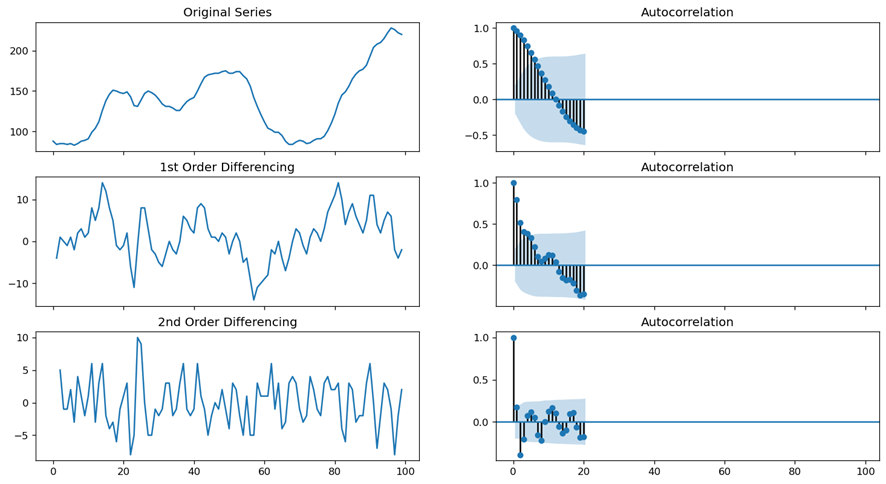

```
ADF Statistic for 1st Order Differencing
ADF Statistic: -2.722238
p-value: 0.070268
Critical Values:
    1%: -3.500
    5%: -2.892
    10%: -2.583

 ADF Statistic for 2nd Order Differencing
ADF Statistic: -9.929762
p-value: 0.000000
Critical Values:
    1%: -3.500
    5%: -2.892
    10%: -2.583

```

Given the results of our ACF and ADF, **we can see that our time series reaches stationarity after two orders of differencing. However, the ACF of the 2nd order differencing goes into the negative zone fairly quick. This can indicates that the series might have been over differenced. It is now up to us if we want consider the first or second order differencing for our ARIMA models.**

**\- Then, d = 1 or d = 2.**

\- If d = 0, we are using ARMA model.

## **The value of "d" corresponds to the total of differentiations for making the process stationary.**

# **Time series seasonal decomposition - Background**

- decomposition_mode = "additive" - manipulate the parameter 'model' from seasonal_decompose.
- Alternatively, set decomposition_mode = "multiplicative" for decomposing as a multiplicative time series.

### **'additive' model**
- An additive model suggests that the components are added together as:

`y(t) = Level + Trend + Seasonality + Noise`

- An additive model is linear where changes over time are consistently made by the same amount.
- A linear trend is a straight line.
- A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).
    
### **'multiplicative' model**
- A multiplicative model suggests that the components are multiplied together as:

`y(t) = Level * Trend * Seasonality * Noise`

- A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.
- A nonlinear trend is a curved line.
- A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

Check:
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=The%20statsmodels%20library%20provides%20an%20implementation%20of%20the,careful%20to%20be%20critical%20when%20interpreting%20the%20result